<a href="https://colab.research.google.com/github/mhdykz/Implementation-of-artificial-intelligence-with-Tensorflow/blob/main/tensor_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [59]:
import numpy as np
import h5py
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Input , Flatten , Dropout , LeakyReLU
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping


To load data we have to load datasets in h5py type.
we have to seprate a section of data to have test dataset for eduction the model.
We use reshape function because our data must be (m,1) shaped.

In [60]:
def load_data():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])  # Training features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])  # Training labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])   # Test features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])   # Test labels

    train_set_y_orig = train_set_y_orig.reshape((train_set_y_orig.shape[0], 1))
    test_set_y_orig = test_set_y_orig.reshape((test_set_y_orig.shape[0], 1))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig

train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig = load_data()

Our data valus are between zero and 255.So we divide the dataset values ​​by 255 so that the values ​​are between 0 and 1 in float 32 mode.

In [61]:
x_train = train_set_x_orig.astype("float32") / 255
x_test = test_set_x_orig.astype("float32") / 255

y_train = train_set_y_orig
y_test = test_set_y_orig

rotation_range=20:
The amount of random rotation of images in the range of 0 to 20 degrees.
This parameter makes the model see images from different angles, making it more resistant to small rotations.

width_shift_range=0.2:
Randomly moving images horizontally by 20% of the image width.
This displacement moves the images left and right so that the model is not sensitive to horizontal displacements.

height_shift_range=0.2:
Random shifting of images vertically by 20% of image height.
This change makes the model resistant to vertical displacements.

shear_range=0.2:
Random cropping in images by 20%. This creates an angular deformation.
This type of transformation helps the model adapt to distorted and skewed images as well.

zoom_range=0.2:
Zoom in or out randomly within 20%.
This change makes the model less sensitive to small changes in the size of objects in the image.

horizontal_flip=True:
Random horizontal inversion of images.
For data such as images of cats, horizontal inversion is useful because the model sees images from left to right and vice versa.

fill_mode='nearest':
When empty space is created during data incrementing (for example, due to rotation or displacement), this parameter determines that the empty space is filled with the nearest pixels.

In [62]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train)

Sequential():
The model is defined sequentially. In sequential models, layers are added one after the other.
That is, each layer takes the output of the previous layer as its input.

Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)):
Conv2D is a convolutional layer used to extract spatial features from the image.

32 : is the number of filters that this layer applies; Each filter extracts a feature from the image.

(3, 3) is the size of each filter (3x3 here).

activation='relu' The ReLU activation function is applied to each neuron, leaving negative values ​​as zero and positive values ​​unchanged.

input_shape=(64, 64, 3) specifies that the input images to the model have dimensions of 64x64 with 3 color channels (RGB).

MaxPooling2D(pool_size=(2, 2)):
This layer reduces the size of the output features and keeps only the most important features.

pool_size=(2, 2) means that in each 2x2 block of the output of the convolution layer, the maximum value is selected (max pooling).

Flatten():
This layer transforms the multidimensional outputs of the convolution layers into a 1D vector to prepare for Dense layers.

Dense(512, activation='relu'):
It is a fully connected layer that has 512 neurons and its activation function is ReLU.
This layer is responsible for using the extracted features and learning more complex patterns.

Dropout(0.5):
This layer randomly disables 50% of the neurons in each step. This helps prevent overfitting.

Dense(1, activation='sigmoid'):
This is the final output layer of the model and contains a neuron with a sigmoid activation function.
sigmoid is the output value between 0 and 1 and is used for binary classification.

In [63]:
model = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
]
)


optimizer=Adam(learning_rate=0.001):
Adam (Adaptive Moment Estimation) is an optimization algorithm that combines the advantages of SGD and RMSProp.

Adam has two important parameters:
β1=0.9: first order weighted average of gradients (average gradients).
β2=0.999: mean square gradients (to reduce fluctuations).
Adam adjusts learning based on the past (previous gradients) and determines the optimal learning rate for each neuron.

loss='binary_crossentropy':
Binary crossentropy loss function is used for binary classification.
This function uses the difference between the actual value and the predicted value to calculate the error.

metrics=['accuracy']:
accuracy is a measure that calculates the accuracy of the model in each step. This value shows what percentage of predictions were correct.

In [64]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

monitor='val_loss':
This parameter specifies what metric to use to monitor and control the stopping process. Here val_loss (validation set error) is the metric.

patience=10 in EarlyStopping:
If no improvement in the monitored criterion (val_loss) is observed within 10 cycles, the training process is stopped.

restore_best_weights=True:
If during the training process, there is a model with a better performance than the current model, the weights of that model are retrieved and replaced by the current model.

ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=1e-6):
This function reduces the learning rate if no improvement in the monitored criterion (val_loss) is observed in 5 consecutive cycles.
factor=0.5 means that the learning rate is reduced to half of the previous value.
min_lr=1e-6 is the minimum learning rate that can be reduced to.

In [65]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=1e-6)

In [66]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=200,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, lr_reduction],
                    verbose=1)


Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 318ms/step - accuracy: 0.6243 - loss: 0.7077 - val_accuracy: 0.3400 - val_loss: 1.0548 - learning_rate: 0.0010
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 301ms/step - accuracy: 0.6655 - loss: 0.6110 - val_accuracy: 0.3400 - val_loss: 0.7636 - learning_rate: 0.0010
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 0.6628 - loss: 0.5615 - val_accuracy: 0.3400 - val_loss: 0.7986 - learning_rate: 0.0010
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - accuracy: 0.6108 - loss: 0.5299 - val_accuracy: 0.3400 - val_loss: 0.9982 - learning_rate: 0.0010
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 0.7317 - loss: 0.4577 - val_accuracy: 0.5600 - val_loss: 0.6472 - learning_rate: 0.0010
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 320ms/step - accuracy: 0.7786 - loss: 0.4382 - val_accuracy: 0.8200 - val_loss: 0.5235 - learning_rate: 0.0010
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 298ms/step - accuracy: 0.7512 - loss: 0.5145 - val_acc

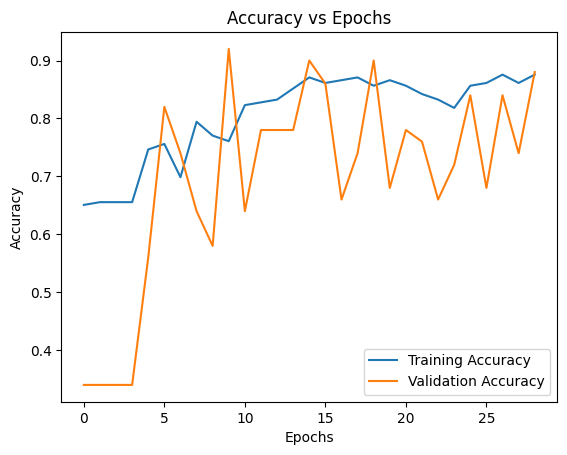

In [67]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


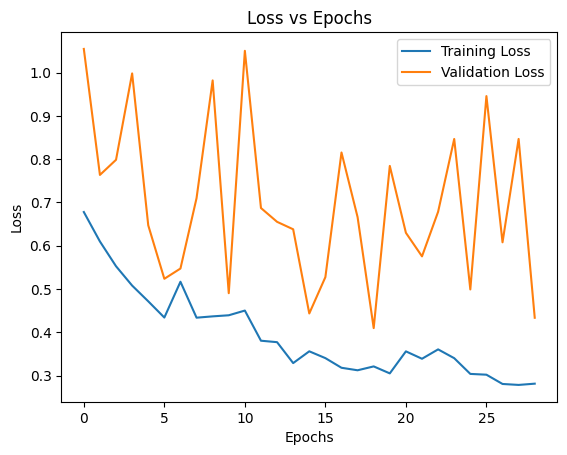

In [68]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [69]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9125 - loss: 0.3466
Test Accuracy: 90.00%


optional describe of code:

1. Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3))
The Conv2D layer is a fundamental layer in a Convolutional Neural Network (CNN), used to extract spatial features from an image. Here's a deeper explanation of this layer:

Filters:
The Conv2D layer uses small matrices called filters (or kernels). Each filter slides over the image, performing a dot product with the corresponding part of the image. Filters help extract different features from the image, such as edges, textures, or patterns.

Number of Filters (32):
This layer uses 32 filters, meaning 32 different features will be extracted from the input image. Each filter learns to detect a specific pattern or feature during training.

Filter Size (3, 3):
The size of each filter is 3x3, meaning it looks at a small 3x3 patch of the image at a time. The filter moves across the image, applying the convolution operation at each step to extract local features.

Stride:
The default stride (step size) is 1, meaning the filter moves 1 pixel at a time across the image. A larger stride would result in faster reduction of the image size but may miss local details.

Padding:
Padding is often used to avoid losing edge pixels when the filter moves across the image. For instance, "same" padding adds extra pixels around the image to maintain the same spatial dimensions as the input.

ReLU Activation:
After the convolution operation, the ReLU (Rectified Linear Unit) activation function is applied. It sets negative values to zero while leaving positive values unchanged, introducing non-linearity and preventing vanishing gradients.

input_shape=(64, 64, 3):
This parameter defines the input image dimensions:

64x64: The width and height of the image.
3: The number of color channels (for RGB images).

2. MaxPooling2D(pool_size=(2, 2))
The MaxPooling2D layer is a pooling layer that reduces the spatial dimensions of the feature maps from the previous convolutional layer. It helps in dimensionality reduction while preserving important features.

Pooling Operation:
Pooling layers downsample the input feature maps by summarizing regions of the input, typically using a maximum or average operation. MaxPooling selects the maximum value in each region.

pool_size=(2, 2):
In this case, the pooling operation takes a 2x2 region from the input feature map and selects the maximum value. This reduces the size of the feature map by half along both width and height, helping to reduce computational load.

Purpose of MaxPooling:

Reduces the spatial dimensions: This reduces the number of parameters and computations in the network.
Retains important features: Only the most significant information is kept, helping the network focus on important features while reducing noise and overfitting.

3. Flatten()
The Flatten layer reshapes the multi-dimensional output from the convolutional layers into a one-dimensional vector, which is required before feeding the data into a fully connected (Dense) layer.

Role of Flatten:
After the convolution and pooling layers, the output is a multi-dimensional array representing the extracted features. Flatten converts this array into a one-dimensional vector so it can be fed into fully connected layers, which expect input in this format.

Why is this important?
Fully connected (Dense) layers require a flat vector as input, representing all the learned features. Flatten ensures the convolutional layers' output is ready for further processing in the Dense layers.



4. Adam Optimizer
Adam (Adaptive Moment Estimation) is an optimization algorithm widely used in deep learning models. It combines the advantages of both Momentum and RMSProp, offering adaptive learning rates for each parameter.

Key Parameters and How Adam Works:
β1=0.9 and β2=0.999:

These are the parameters for the moving averages of the gradients:
β1: This controls the exponential decay rate for the first moment estimate (the mean of past gradients). A value of 0.9 means that Adam remembers 90% of past gradients.
β2: This controls the decay rate for the second moment estimate (the variance of past gradients). It helps in smoothing out the learning process by reducing the influence of large gradients.
Gradient:
A gradient measures how much the loss function changes with respect to a specific weight. In other words, it shows the direction and magnitude of the change required to minimize the loss function.

Positive Gradient: Tells the model to reduce the weight.
Negative Gradient: Tells the model to increase the weight.
Adam calculates gradients using past values, smoothing them out to reduce sudden changes. This adaptive learning mechanism ensures a smoother learning process and prevents overshooting or getting stuck in local minima.

Adaptive Learning Rate:
Adam adjusts the learning rate individually for each parameter based on the historical gradients. This helps speed up learning when necessary and slows it down when fine-tuning.

In [70]:
#model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

optimizer=optimizer:
In this case, we use Adam as the optimizer to adjust the model's weights based on the gradients calculated during backpropagation.

loss='binary_crossentropy':
Binary Crossentropy is a loss function used for binary classification problems. It measures the difference between the predicted probabilities and the actual labels (0 or 1). The goal is to minimize this difference.

metrics=['accuracy']:
The accuracy metric is used to evaluate how well the model's predictions match the true labels. It calculates the percentage of correct predictions.

EarlyStopping:

In [ ]:
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

monitor='val_loss':
This tells EarlyStopping to monitor the validation loss. If the validation loss stops improving for a certain number of epochs (controlled by patience), training will be stopped.

patience=10:
This specifies the number of epochs to wait for an improvement in the validation loss. If no improvement is observed for 10 consecutive epochs, training is stopped to prevent overfitting.

restore_best_weights=True:
If the training stops early, this parameter ensures that the model's weights are reset to the best-performing version, not the last one.

ReduceLROnPlateau:

In [ ]:
#lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=1e-6)

monitor='val_loss':
Similar to EarlyStopping, this parameter monitors the validation loss. When the validation loss stops improving, the learning rate is reduced.

patience=5:
This specifies how many epochs to wait for improvement in validation loss. If no improvement is observed for 5 consecutive epochs, the learning rate will be reduced.

factor=0.5:
When the learning rate is reduced, it is multiplied by this factor. In this case, the learning rate is halved.

min_lr=1e-6:
This is the minimum learning rate allowed. Once the learning rate reaches this threshold, it will no longer be reduced.
